## Lec 9

# Install Python Libraries

In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 24.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 25.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 63 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 66.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 6.0 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

# Load the Authorization Info

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

# Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

# Use the REST API to Collect Tweets

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [10]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [11]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:24:31 +0000 2021'
'Wed Nov 03 20:24:30 +0000 2021'
'Wed Nov 03 20:24:29 +0000 2021'
'Wed Nov 03 20:24:28 +0000 2021'
'Wed Nov 03 20:24:28 +0000 2021'
'Wed Nov 03 20:24:28 +0000 2021'
'Wed Nov 03 20:24:28 +0000 2021'
'Wed Nov 03 20:24:28 +0000 2021'
'Wed Nov 03 20:24:27 +0000 2021'
'Wed Nov 03 20:24:27 +0000 2021'
'Wed Nov 03 20:24:27 +0000 2021'
'Wed Nov 03 20:24:26 +0000 2021'
'Wed Nov 03 20:24:25 +0000 2021'
'Wed Nov 03 20:24:25 +0000 2021'
'Wed Nov 03 20:24:24 +0000 2021'
'Wed Nov 03 20:24:23 +0000 2021'
'Wed Nov 03 20:24:22 +0000 2021'
'Wed Nov 03 20:24:22 +0000 2021'
'Wed Nov 03 20:24:22 +0000 2021'
'Wed Nov 03 20:24:22 +0000 2021'
'Wed Nov 03 20:24:20 +0000 2021'
'Wed Nov 03 20:24:20 +0000 2021'
'Wed Nov 03 20:24:19 +0000 2021'
'Wed Nov 03 20:24:19 +0000 2021'
'Wed Nov 03 20:24:19 +0000 2021'
'Wed Nov 03 20:24:19 +0000 2021'
'Wed Nov 03 20:24:18 +0000 2021'
'Wed Nov 03 20:24:16 +0000 2021'
'Wed Nov 03 20:24:16 +0000 2021'
'Wed Nov 03 20:24:15 +0000 2021'
'Wed Nov 0

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                            max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 03 20:23:44 +0000 2021'
'Wed Nov 03 20:23:43 +0000 2021'
'Wed Nov 03 20:23:43 +0000 2021'
'Wed Nov 03 20:23:42 +0000 2021'
'Wed Nov 03 20:23:42 +0000 2021'
'Wed Nov 03 20:23:42 +0000 2021'
'Wed Nov 03 20:23:42 +0000 2021'
'Wed Nov 03 20:23:41 +0000 2021'
'Wed Nov 03 20:23:40 +0000 2021'
'Wed Nov 03 20:23:40 +0000 2021'
'Wed Nov 03 20:23:39 +0000 2021'
'Wed Nov 03 20:23:39 +0000 2021'
'Wed Nov 03 20:23:37 +0000 2021'
'Wed Nov 03 20:23:37 +0000 2021'
'Wed Nov 03 20:23:37 +0000 2021'
'Wed Nov 03 20:23:37 +0000 2021'
'Wed Nov 03 20:23:37 +0000 2021'
'Wed Nov 03 20:23:37 +0000 2021'
'Wed Nov 03 20:23:36 +0000 2021'
'Wed Nov 03 20:23:36 +0000 2021'
'Wed Nov 03 20:23:35 +0000 2021'
'Wed Nov 03 20:23:35 +0000 2021'
'Wed Nov 03 20:23:34 +0000 2021'
'Wed Nov 03 20:23:34 +0000 2021'
'Wed Nov 03 20:23:32 +0000 2021'
'Wed Nov 03 20:23:30 +0000 2021'
'Wed Nov 03 20:23:29 +0000 2021'
'Wed Nov 03 20:23:29 +0000 2021'
'Wed Nov 03 20:23:28 +0000 2021'
'Wed Nov 03 20:23:28 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:21:37 +0000 2021'
'Wed Nov 03 20:21:36 +0000 2021'
'Wed Nov 03 20:21:36 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:32 +0000 2021'
'Wed Nov 03 20:21:32 +0000 2021'
'Wed Nov 03 20:21:32 +0000 2021'
'Wed Nov 03 20:21:31 +0000 2021'
'Wed Nov 03 20:21:31 +0000 2021'
'Wed Nov 03 20:21:31 +0000 2021'
'Wed Nov 03 20:21:30 +0000 2021'
'Wed Nov 03 20:21:29 +0000 2021'
'Wed Nov 03 20:21:28 +0000 2021'
'Wed Nov 03 20:21:27 +0000 2021'
'Wed Nov 03 20:21:27 +0000 2021'
'Wed Nov 03 20:21:27 +0000 2021'
'Wed Nov 03 20:21:26 +0000 2021'
'Wed Nov 03 20:21:26 +0000 2021'
'Wed Nov 03 20:21:26 +0000 2021'
'Wed Nov 03 20:21:26 +0000 2021'
'Wed Nov 03 20:21:26 +0000 2021'
'Wed Nov 03 20:21:25 +0000 2021'
'Wed Nov 03 20:21:25 +0000 2021'
'Wed Nov 03 20:21:24 +0000 2021'
'Wed Nov 03 20:21:24 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:19:38 +0000 2021'
'Wed Nov 03 20:19:37 +0000 2021'
'Wed Nov 03 20:19:37 +0000 2021'
'Wed Nov 03 20:19:36 +0000 2021'
'Wed Nov 03 20:19:36 +0000 2021'
'Wed Nov 03 20:19:36 +0000 2021'
'Wed Nov 03 20:19:36 +0000 2021'
'Wed Nov 03 20:19:34 +0000 2021'
'Wed Nov 03 20:19:34 +0000 2021'
'Wed Nov 03 20:19:34 +0000 2021'
'Wed Nov 03 20:19:34 +0000 2021'
'Wed Nov 03 20:19:33 +0000 2021'
'Wed Nov 03 20:19:32 +0000 2021'
'Wed Nov 03 20:19:31 +0000 2021'
'Wed Nov 03 20:19:31 +0000 2021'
'Wed Nov 03 20:19:30 +0000 2021'
'Wed Nov 03 20:19:30 +0000 2021'
'Wed Nov 03 20:19:29 +0000 2021'
'Wed Nov 03 20:19:28 +0000 2021'
'Wed Nov 03 20:19:27 +0000 2021'
'Wed Nov 03 20:19:27 +0000 2021'
'Wed Nov 03 20:19:26 +0000 2021'
'Wed Nov 03 20:19:25 +0000 2021'
'Wed Nov 03 20:19:25 +0000 2021'
'Wed Nov 03 20:19:24 +0000 2021'
'Wed Nov 03 20:19:24 +0000 2021'
'Wed Nov 03 20:19:24 +0000 2021'
'Wed Nov 03 20:19:23 +0000 2021'
'Wed Nov 03 20:19:23 +0000 2021'
'Wed Nov 03 20:19:22 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:17:25 +0000 2021'
'Wed Nov 03 20:17:25 +0000 2021'
'Wed Nov 03 20:17:24 +0000 2021'
'Wed Nov 03 20:17:24 +0000 2021'
'Wed Nov 03 20:17:23 +0000 2021'
'Wed Nov 03 20:17:23 +0000 2021'
'Wed Nov 03 20:17:22 +0000 2021'
'Wed Nov 03 20:17:22 +0000 2021'
'Wed Nov 03 20:17:20 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:18 +0000 2021'
'Wed Nov 03 20:17:17 +0000 2021'
'Wed Nov 03 20:17:17 +0000 2021'
'Wed Nov 03 20:17:16 +0000 2021'
'Wed Nov 03 20:17:16 +0000 2021'
'Wed Nov 03 20:17:16 +0000 2021'
'Wed Nov 03 20:17:14 +0000 2021'
'Wed Nov 03 20:17:14 +0000 2021'
'Wed Nov 03 20:17:13 +0000 2021'
'Wed Nov 03 20:17:11 +0000 2021'
'Wed Nov 03 20:17:11 +0000 2021'
'Wed Nov 03 20:17:10 +0000 2021'
'Wed Nov 03 20:17:09 +0000 2021'
'Wed Nov 03 20:17:09 +0000 2021'
'Wed Nov 03 20:17:08 +0000 2021'
'Wed Nov 03 20:17:08 +0000 2021'
'Wed Nov 03 20:17:08 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:11 +0000 2021'
'Wed Nov 03 20:15:10 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:06 +0000 2021'
'Wed Nov 03 20:15:06 +0000 2021'
'Wed Nov 03 20:15:05 +0000 2021'
'Wed Nov 03 20:15:05 +0000 2021'
'Wed Nov 03 20:15:05 +0000 2021'
'Wed Nov 03 20:15:04 +0000 2021'
'Wed Nov 03 20:15:04 +0000 2021'
'Wed Nov 03 20:15:04 +0000 2021'
'Wed Nov 03 20:15:04 +0000 2021'
'Wed Nov 03 20:15:04 +0000 2021'
'Wed Nov 03 20:15:04 +0000 2021'
'Wed Nov 03 20:15:04 +0000 2021'
'Wed Nov 03 20:15:03 +0000 2021'
'Wed Nov 03 20:15:03 +0000 2021'
'Wed Nov 03 20:15:03 +0000 2021'
'Wed Nov 03 20:15:02 +0000 2021'
'Wed Nov 03 20:15:02 +0000 2021'
'Wed Nov 03 20:15:02 +0000 2021'
'Wed Nov 03 20:15:02 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:13:08 +0000 2021'
'Wed Nov 03 20:13:07 +0000 2021'
'Wed Nov 03 20:13:07 +0000 2021'
'Wed Nov 03 20:13:05 +0000 2021'
'Wed Nov 03 20:13:04 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:02 +0000 2021'
'Wed Nov 03 20:13:02 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:00 +0000 2021'
'Wed Nov 03 20:13:00 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:58 +0000 2021'
'Wed Nov 03 20:12:58 +0000 2021'
'Wed Nov 03 20:12:57 +0000 2021'
'Wed Nov 03 20:12:57 +0000 2021'
'Wed Nov 03 20:12:57 +0000 2021'
'Wed Nov 03 20:12:56 +0000 2021'
'Wed Nov 03 20:12:56 +0000 2021'
'Wed Nov 03 20:12:55 +0000 2021'
'Wed Nov 03 20:12:54 +0000 2021'
'Wed Nov 03 20:12:54 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:10:34 +0000 2021'
'Wed Nov 03 20:10:33 +0000 2021'
'Wed Nov 03 20:10:33 +0000 2021'
'Wed Nov 03 20:10:33 +0000 2021'
'Wed Nov 03 20:10:32 +0000 2021'
'Wed Nov 03 20:10:32 +0000 2021'
'Wed Nov 03 20:10:31 +0000 2021'
'Wed Nov 03 20:10:31 +0000 2021'
'Wed Nov 03 20:10:29 +0000 2021'
'Wed Nov 03 20:10:29 +0000 2021'
'Wed Nov 03 20:10:29 +0000 2021'
'Wed Nov 03 20:10:29 +0000 2021'
'Wed Nov 03 20:10:29 +0000 2021'
'Wed Nov 03 20:10:28 +0000 2021'
'Wed Nov 03 20:10:28 +0000 2021'
'Wed Nov 03 20:10:28 +0000 2021'
'Wed Nov 03 20:10:28 +0000 2021'
'Wed Nov 03 20:10:27 +0000 2021'
'Wed Nov 03 20:10:27 +0000 2021'
'Wed Nov 03 20:10:27 +0000 2021'
'Wed Nov 03 20:10:27 +0000 2021'
'Wed Nov 03 20:10:25 +0000 2021'
'Wed Nov 03 20:10:25 +0000 2021'
'Wed Nov 03 20:10:24 +0000 2021'
'Wed Nov 03 20:10:23 +0000 2021'
'Wed Nov 03 20:10:23 +0000 2021'
'Wed Nov 03 20:10:23 +0000 2021'
'Wed Nov 03 20:10:23 +0000 2021'
'Wed Nov 03 20:10:22 +0000 2021'
'Wed Nov 03 20:10:22 +0000 2021'
'Wed Nov 0

KeyboardInterrupt: 

# View Tweets Collected

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

1783
1618


### Create a text index

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

### Create cursor

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

### Use pprint to display tweets

In [18]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Eli K
text: Before #COVID19 vax / after #COVID19 vax https://t.co/OAEDLScmaT
----
name: Jemima Williams
text: RT @simon_ball46: #coronavirus #COVID19 #COVID19 
most of all its #herdimmunity , whilst he swans off and falls asleep at #COP26Glasgow 
#B…
----
name: Robert Gillespie#IamEuropean
text: RT @clopys12: My hospitals #COVID19 admissions are rising 

⁦@BorisJohnson⁩ flagship #COVID19 defence (Booster vaccinations )has failed and…
----
name: Katharina Ó Cathaoir
text: RT @NILegalQ: #COVID19 has proven a key issue for #law. 

In our forthcoming supplementary special issue on #COVID19 #law, we bring togethe…
----
name: FennaGrunden
text: RT @FreedomPodcast1: 93.7% of the latest #COVID19 deaths in Scotland were #vaccinated
90.5% were FULLY vaccinated 

A total 530 COVID19 dea…
----
name: b_erawa 🇵🇱
text: RT @SpirOxy: Choroby COVID19 nie wolno leczyć; są są to duże kary dla lekarzy.
Przeciw COVID19 można tylko szczepić; są za to duże nagrody…
----
name: Jose G. Ortiz
text: RT

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

### Use Pandas to display tweets

In [20]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,possibly_sensitive,extended_entities,quoted_status
0,6182f10632d15055ec19c14a,Wed Nov 03 20:09:57 +0000 2021,1455990654291615749,1455990654291615749,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,6182f10432d15055ec19c105,Wed Nov 03 20:10:29 +0000 2021,1455990786823184385,1455990786823184385,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,6182f10432d15055ec19c0e0,Wed Nov 03 20:10:45 +0000 2021,1455990855353962497,1455990855353962497,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,6182f10432d15055ec19c0dd,Wed Nov 03 20:10:48 +0000 2021,1455990866326302723,1455990866326302723,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,6182f10432d15055ec19c0d8,Wed Nov 03 20:10:50 +0000 2021,1455990874484137988,1455990874484137988,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
5,6182f10432d15055ec19c0d7,Wed Nov 03 20:10:50 +0000 2021,1455990874874261509,1455990874874261509,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
6,6182f10332d15055ec19c0bc,Wed Nov 03 20:11:05 +0000 2021,1455990939097473030,1455990939097473030,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
7,6182f10232d15055ec19c086,Wed Nov 03 20:11:35 +0000 2021,1455991063672414213,1455991063672414213,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
8,6182f10132d15055ec19c066,Wed Nov 03 20:11:52 +0000 2021,1455991136913444867,1455991136913444867,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN
9,6182f10132d15055ec19c04a,Wed Nov 03 20:12:04 +0000 2021,1455991187119149058,1455991187119149058,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

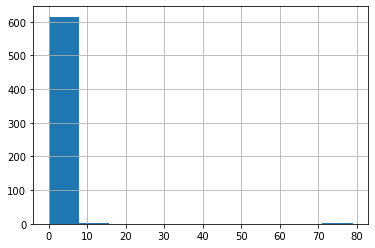

In [21]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count